In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("house_price.csv")
df

,Area,Bedrooms,Bathrooms,Stories,Parking,City_Rating,Age,Distance_From_CityCenter,Price
0,850,2,1,1,0,3,12,15,32
1,900,2,1,1,1,4,10,12,35
2,1000,2,2,1,1,4,8,10,42
3,1200,3,2,1,1,4,5,8,50
4,1300,3,2,2,1,5,4,6,58
5,1500,3,3,2,1,5,3,5,66
6,1600,3,3,2,1,4,2,5,70
7,1700,4,3,2,1,5,1,4,78
8,1800,4,3,2,1,5,1,3,82
9,2000,4,4,3,1,5,1,3,95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Area                      10 non-null     int64
 1   Bedrooms                  10 non-null     int64
 2   Bathrooms                 10 non-null     int64
 3   Stories                   10 non-null     int64
 4   Parking                   10 non-null     int64
 5   City_Rating               10 non-null     int64
 6   Age                       10 non-null     int64
 7   Distance_From_CityCenter  10 non-null     int64
 8   Price                     10 non-null     int64
dtypes: int64(9)
memory usage: 852.0 bytes


In [4]:
df.describe()

,Area,Bedrooms,Bathrooms,Stories,Parking,City_Rating,Age,Distance_From_CityCenter,Price
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1385.000000,3.000000,2.400000,1.700000,0.900000,4.400000,4.700000,7.100000,60.800000
std,397.247474,0.816497,0.966092,0.674949,0.316228,0.699206,4.001389,4.067486,21.080797
min,850.000000,2.000000,1.000000,1.000000,0.000000,3.000000,1.000000,3.000000,32.000000
25%,1050.000000,2.250000,2.000000,1.000000,1.000000,4.000000,1.250000,4.250000,44.000000
50%,1400.000000,3.000000,2.500000,2.000000,1.000000,4.500000,3.500000,5.500000,62.000000
75%,1675.000000,3.750000,3.000000,2.000000,1.000000,5.000000,7.250000,9.500000,76.000000
max,2000.000000,4.000000,4.000000,3.000000,1.000000,5.000000,12.000000,15.000000,95.000000


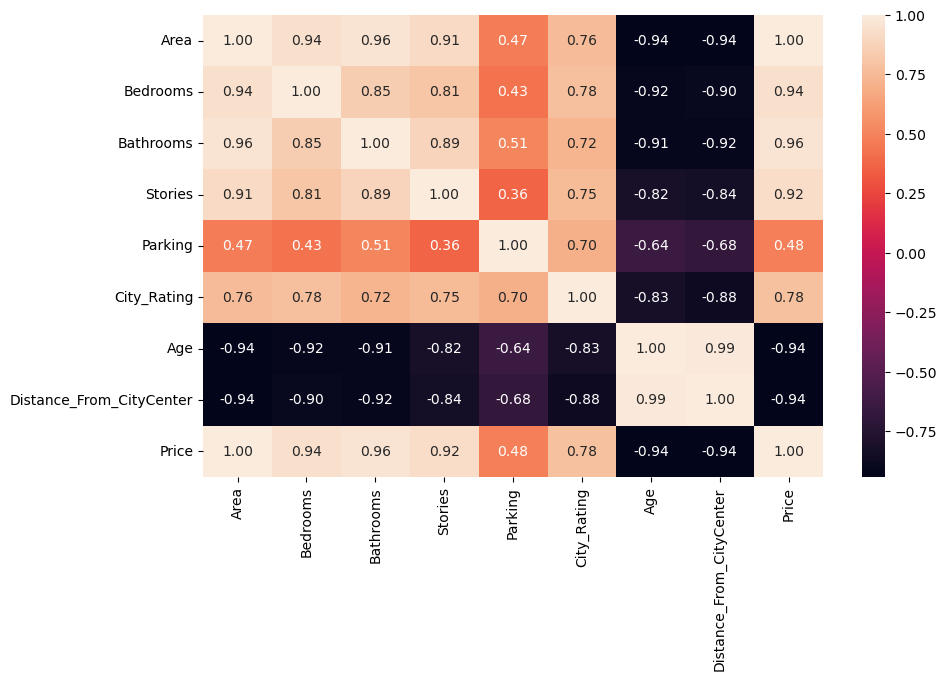

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [6]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'City_Rating',
       'Age', 'Distance_From_CityCenter', 'Price'],
      dtype='object')

In [7]:
df.drop('Age',axis=1,inplace=True)
df.drop('Distance_From_CityCenter',axis=1,inplace=True)

In [8]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'City_Rating',
       'Price'],
      dtype='object')

In [9]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'City_Rating']]
y = df['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -1.5000000000168399
Coefficients: [ 0.01  8.    7.    8.    2.5  -2.  ]


In [13]:
y_pred = model.predict(X_test)
y_pred

array([78., 33.])

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 9.99999999999217
RMSE: 3.1622776601671414
R² Score: 0.9818922589407113


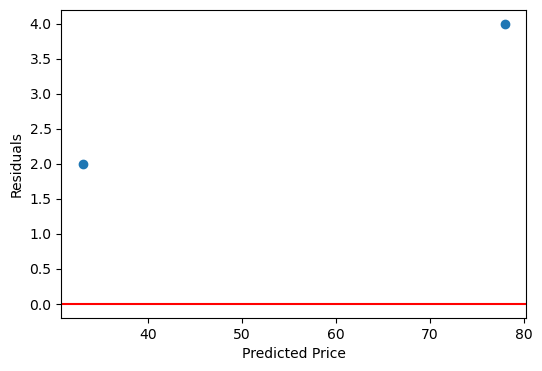

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()